In [18]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import plumed
import nglview
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io import *
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate
from ase.io.proteindatabank import read_proteindatabank, write_proteindatabank
from ase.io.lammpsdata import write_lammps_data

! rm *.vasp

### image is taken from:  CsSnI3: Semiconductor or Metal? High Electrical Conductivity and Strong Near-Infrared Photoluminescence from a Single Material. High Hole Mobility and Phase-Transitions: 10.1021/ja301539s

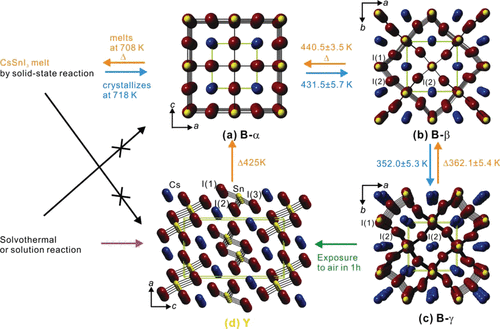

## cubic 3C polymorph: 10.1021/ja301539s
- Experimental data at 500K
   - ICSD 262925
   - ICSD Structure :  Cs I3 Sn
   - Space Group: P m 3 m (221)
   - Cell: a 6.2057Å b 6.2057Å c 6.2057Å, α 90° β 90° γ 90°

Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[12.4114, 6.2057, 12.4114], spacegroup_kinds=...)

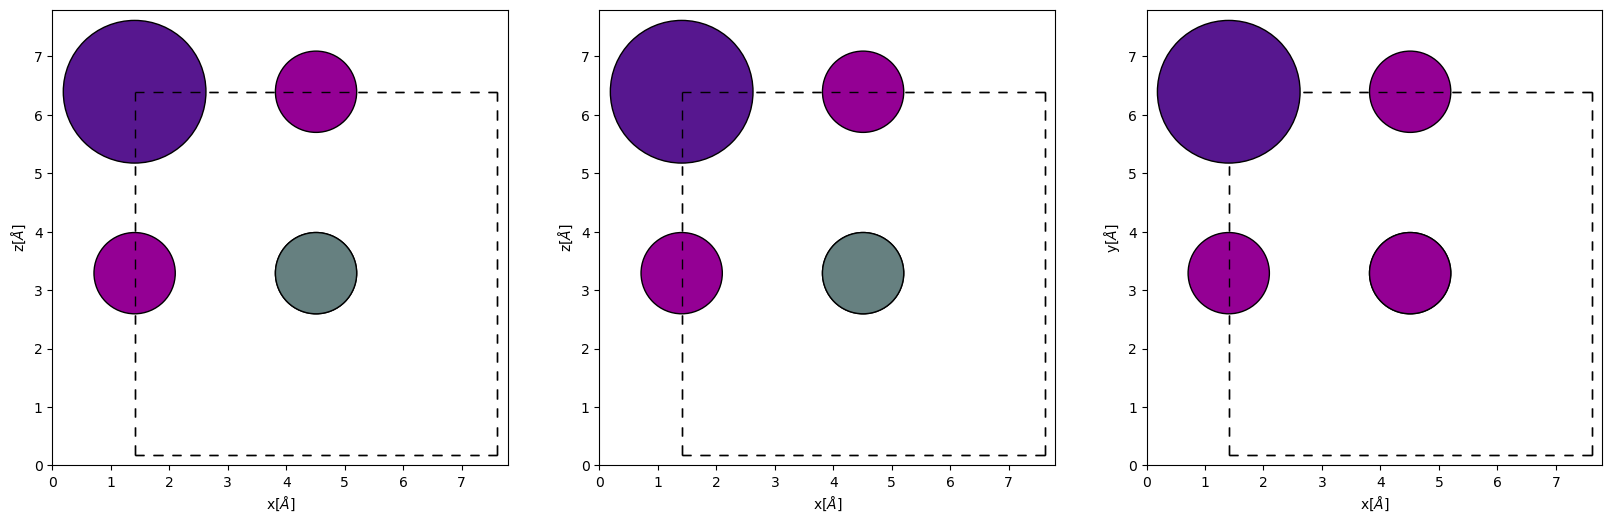

In [10]:
structure = io.read('cubic.cif')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")


supercell = structure.repeat((2,1,2))
supercell = sort(supercell)
write_vasp('cubic212.vasp', supercell, vasp5=True, direct=True)

supercell


## Getting down with CHGNET

In [2]:
import warnings
from pymatgen.core import Structure
from chgnet.model.dynamics import MolecularDynamics
warnings.filterwarnings("ignore", module="ase")

struct = Structure.from_file("cubic.cif")
struct = struct.make_supercell([4,4,4])
ensemble = "npt"
temperature = 300  # in K

# setup NPT MD simulation
md = MolecularDynamics(
    atoms=struct,
    ensemble=ensemble,
    temperature=temperature,
    timestep=5,  # in femtosecond
    trajectory=f"md_out_CsSnI3_cubic_{ensemble}_T_{temperature}.traj",
    logfile=f"md_out_CsSnI3_cubic_{ensemble}_T_{temperature}.log",
    loginterval=100,
)
md.run(200000)  # 1 ns simulation

/home/ahlawat/miniconda3/lib/python3.9/site-packages/pymatgen/io/cif.py:1186: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(
/home/ahlawat/miniconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
Completed bulk modulus calculation: k = 11.8GPa, 0.0736eV/A^3
NPT-Berendsen-inhomogeneous-MD created


KeyboardInterrupt: 

In [3]:
from ase.io import read
from ase.visualize import view
atom =read('md_out_CsSnI3_cubic_npt_T_300.traj', index=':', format='traj')
#atom.wrap()
view(atom)

<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python3.9', '-...>

Traceback (most recent call last):
  File "/home/ahlawat/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ahlawat/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ahlawat/miniconda3/lib/python3.9/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/ahlawat/miniconda3/lib/python3.9/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/home/ahlawat/.local/lib/python3.9/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/home/ahlawat/.local/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/home/ahlawat/.local/lib/python3.9/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operation on closed file.


## tetragonal polymorph:   http://dx.doi.org/10.1021/ja301539s
- Experimental data at 380K
  - ICSD 262925
  - Space Group: P 4/m b m (127)
  - Cell: a 8.7182Å b 8.7182Å c 6.1908Å, α 90° β 90° γ 90°

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(127, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[8.7182, 8.7182, 12.3816], spacegroup_kinds=...)

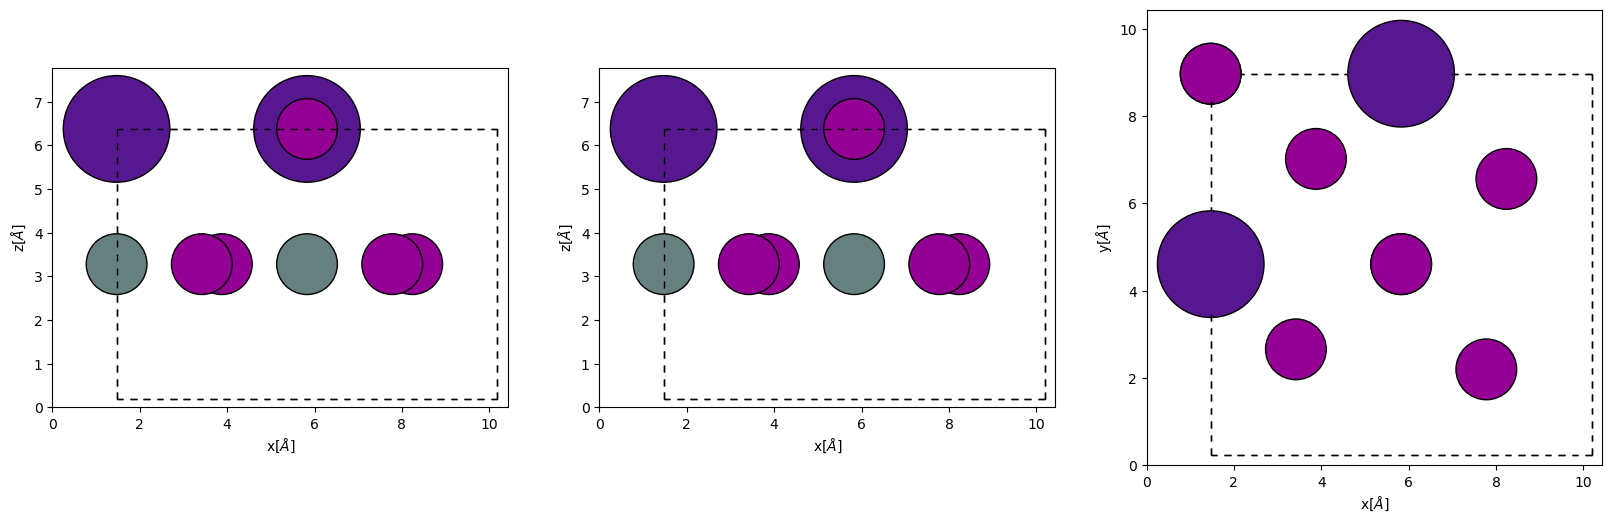

In [3]:
structure = io.read('beta.cif')

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

supercell = structure.repeat((1,1,2))
supercell = sort(supercell)
write_vasp('beta112.vasp', supercell, vasp5=True, direct=True)

supercell


## orthorhombic polymorph: http://dx.doi.org/10.1021/ja301539s
- Experimental data at 300K
  - ICSD 262926
  - ICSD Structure : (Cs I3 Pb)n
  - Space Group:  P n m a (62)
  - Cell: a 8.6885Å b 12.3775Å c 8.6384Å, α 90° β 90° γ 90°

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[8.6885, 12.3775, 8.6384], spacegroup_kinds=...)

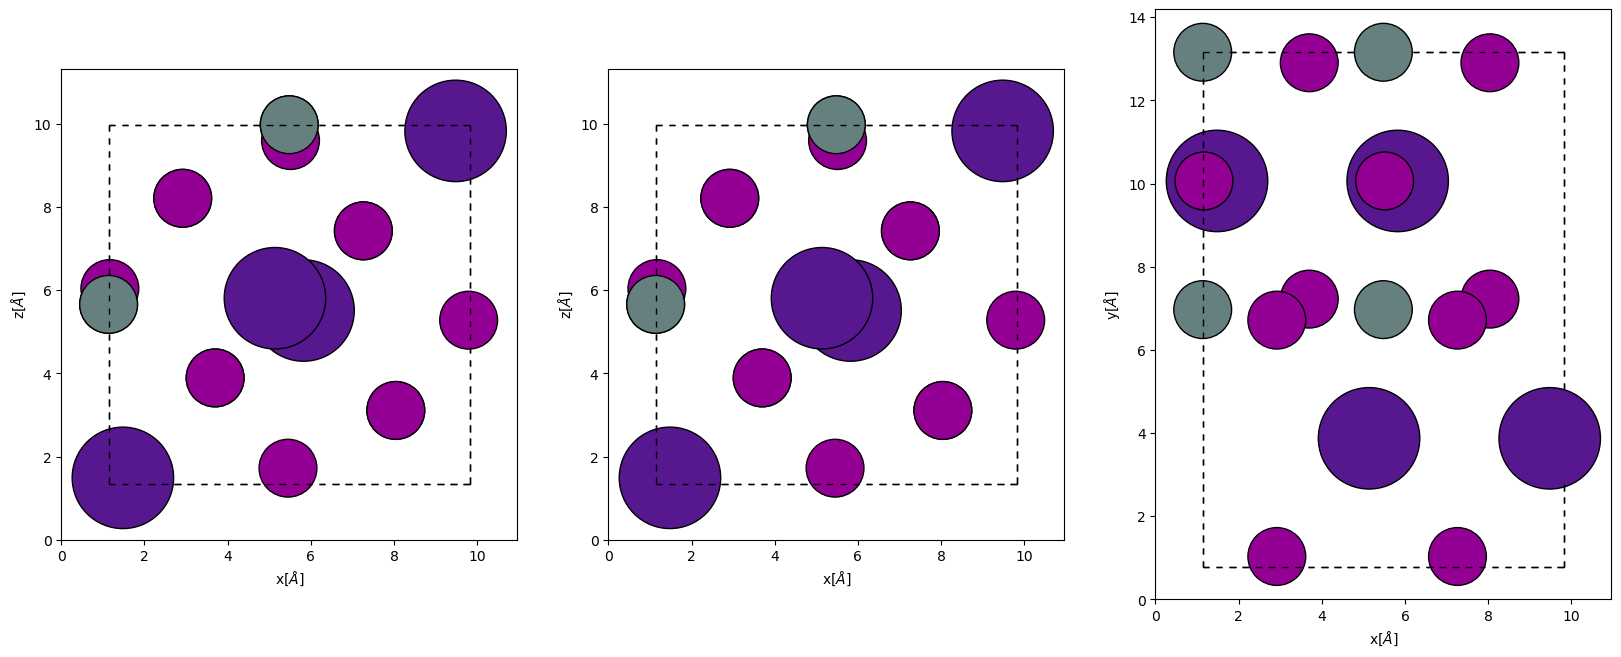

In [19]:
structure = io.read('gamma.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

supercell = sort(structure)
write_vasp('gamma.vasp', supercell, vasp5=True, direct=True)
write_proteindatabank('gamma.pdb', supercell)

supercell


## delta-hexagonal polymorph: http://dx.doi.org/10.1021/ja301539s
- Experimental data at 300K
  - ICSD 262927 
  - Space group:  P n m a (62)	
  - cell: a 10.3495Å b 4.7632Å c 17.684Å, α 90° β 90° γ 90° 			
  - Polymorph: delta polymorph
  - Colour: yellow


/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[10.3495, 4.7632, 17.684], spacegroup_kinds=...)

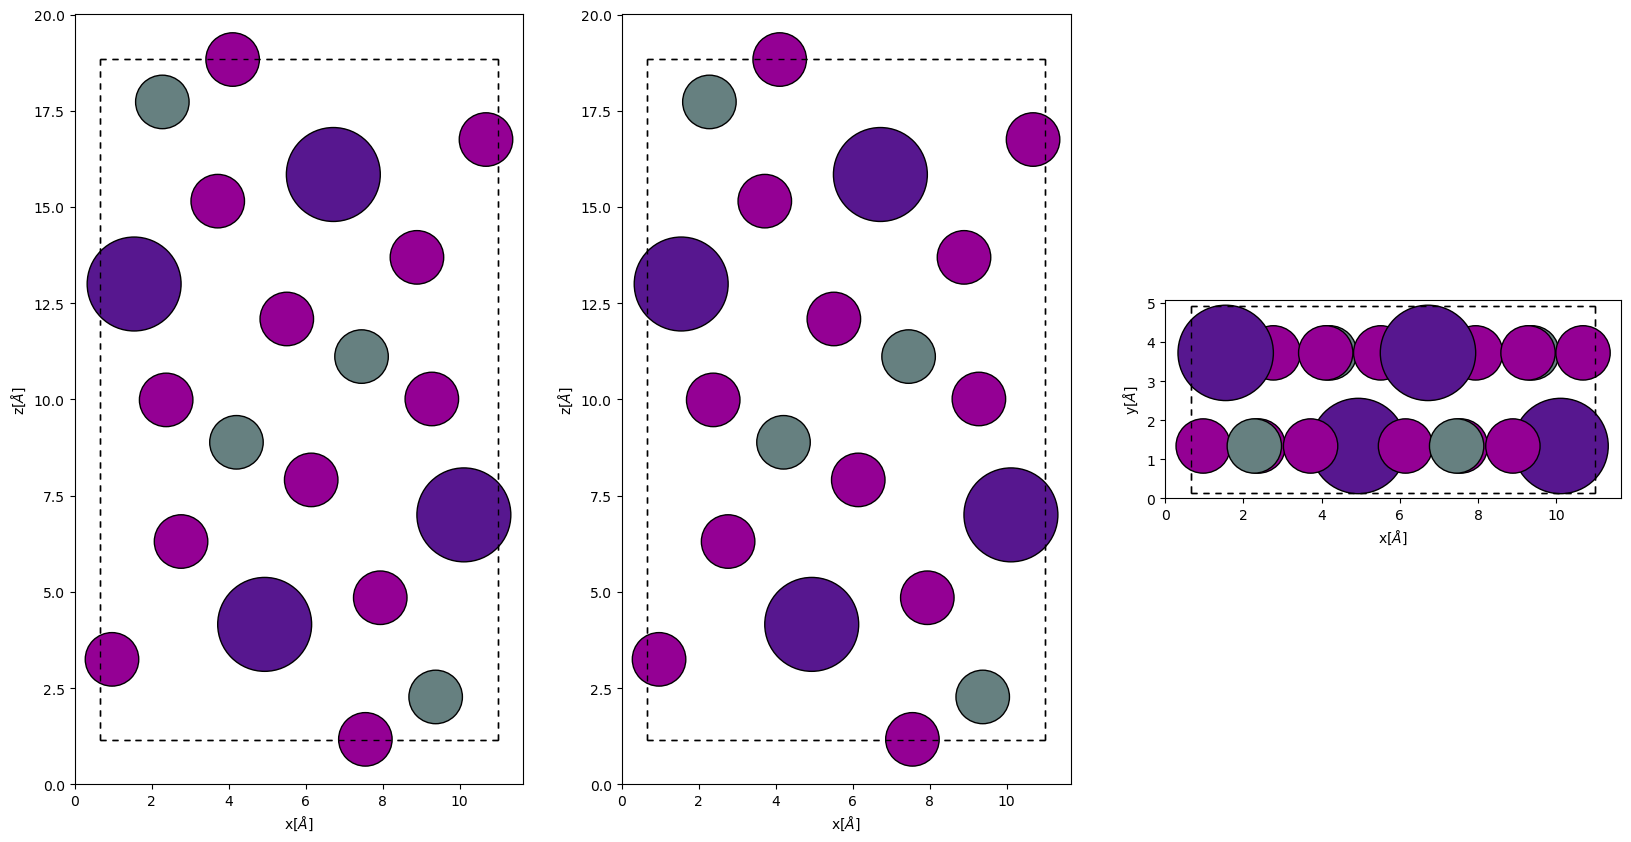

In [4]:
structure = io.read('delta.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

supercell = sort(structure)
write_vasp('delta.vasp', supercell, vasp5=True, direct=True)

supercell


In [4]:
import warnings
from pymatgen.core import Structure
from chgnet.model.dynamics import MolecularDynamics
warnings.filterwarnings("ignore", module="ase")

struct = Structure.from_file("delta.cif")
struct = struct.make_supercell([3,8,2])
ensemble = "npt"
temperature = 300  # in K

# setup NPT MD simulation
md = MolecularDynamics(
    atoms=struct,
    ensemble=ensemble,
    temperature=temperature,
    timestep=5,  # in femtosecond
    trajectory=f"md_out_CsSnI3_delta_{ensemble}_T_{temperature}.traj",
    logfile=f"md_out_CsSnI3_delta_{ensemble}_T_{temperature}.log",
    loginterval=100,
)
md.run(200000)  # 1 ns simulation

/home/ahlawat/miniconda3/lib/python3.9/site-packages/pymatgen/io/cif.py:1186: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
Completed bulk modulus calculation: k = 8.89GPa, 0.0555eV/A^3
NPT-Berendsen-inhomogeneous-MD created


KeyboardInterrupt: 

In [5]:
from ase.io import read
from ase.visualize import view
atom =read('md_out_CsSnI3_delta_npt_T_300.traj', index=':', format='traj')
#atom.wrap()
view(atom)

<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python3.9', '-...>

Traceback (most recent call last):
  File "/home/ahlawat/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ahlawat/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ahlawat/miniconda3/lib/python3.9/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/ahlawat/miniconda3/lib/python3.9/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/home/ahlawat/.local/lib/python3.9/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/home/ahlawat/.local/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/home/ahlawat/.local/lib/python3.9/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operation on closed file.
